<a href="https://colab.research.google.com/github/Spocklight/Data_Mining_Bases/blob/main/EjercicioTextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica del módulo de Data Mining
###*Alejandro Sierra Fernández*


Comenzamos descargando el archivo y definiendo algunas funciones de carga y preparación de los datos:

In [3]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflati

In [4]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt 
    que se introduce en su entrada. 
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()
  
  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob). 
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


Comenzamos importando algunas de las librerías que hemos empleado durante el curso y que utilizaremos más adelante:

In [66]:
import sys
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re  
!{sys.executable} -m pip install contractions
import contractions 

!pip install sentiment-analysis-spanish
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Eliminamos los mensajes de "futurewarnings"

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 28.3 MB/s 
     |████████████████████████████████| 6.6 MB 53.7 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 52.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## 1. Obtención del corpus
Para la obtención de los datos tenemos disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe 

In [6]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [7]:
datos_ejercicio.head(4)


,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


In [8]:
type(datos_ejercicio)

pandas.core.frame.DataFrame

In [9]:
texto_tweets = datos_ejercicio["tweet_text"].to_list()
print(type(texto_tweets))

<class 'list'>


## 2. Análisis exploratorio

Comenzamos observando que tenemos un dataframe compuesto por cuatro columnas distintas. Una primera con el identificador del tweet, una segunda con el texto, una tercera que define a qué clase pertenece y una cuarta que nos separa los datos entre el set de train y el set del test:

In [10]:
datos_ejercicio.dtypes


tweet_id       int64
tweet_text    object
label          int64
set           object
dtype: object

In [11]:
print("Tenemos un conjunto de {} documentos".format(len(datos_ejercicio)))


Tenemos un conjunto de 8000 documentos


Se observa un desbalanceo en la clase que tenemos que predecir, lo que hará más complicado el desarrollo del modelo. Aproximadamente, el 76% de los datos pertenece a la clase 0 y sólo el 23% a la clase 1. Esto es algo importante que más adelante habrá que tener en cuenta.

In [12]:
display(datos_ejercicio["label"].value_counts(normalize=True)*100)

0    76.625
1    23.375
Name: label, dtype: float64

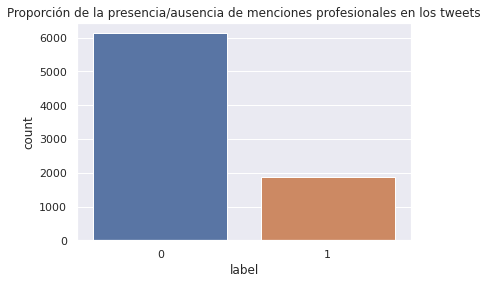

In [13]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="label", data = datos_ejercicio).set(title='Proporción de la presencia/ausencia de menciones profesionales en los tweets')

Vemos que esta proporción se mantiene relativamente constante tanto en el el set de train como en el set de validación.

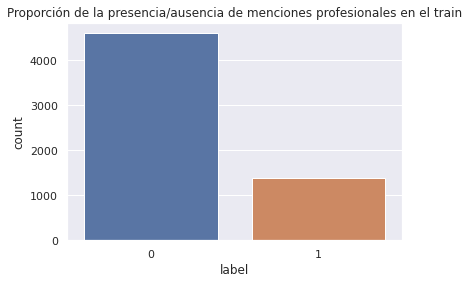

In [14]:
ax = sns.countplot(x="label", data = datos_ejercicio[datos_ejercicio.set=="train"]).set(title='Proporción de la presencia/ausencia de menciones profesionales en el train')

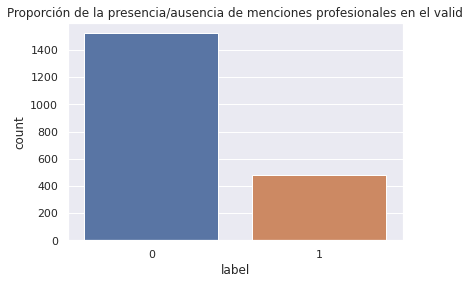

In [15]:
ax = sns.countplot(x="label", data = datos_ejercicio[datos_ejercicio.set=="valid"]).set(title='Proporción de la presencia/ausencia de menciones profesionales en el valid')

Comprobamos que tenemos un 75% de los datos para entrenar al modelo y un 25% para hacer el test. Esta es una forma de dividir el dataset apropiada para el trabajo que realizaremos más adelante.

In [16]:
display(datos_ejercicio["set"].value_counts(normalize=True)*100)

train    75.0
valid    25.0
Name: set, dtype: float64

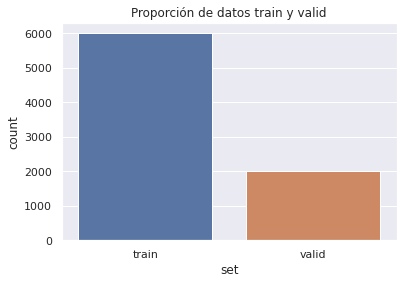

In [17]:
ax = sns.countplot(x="set", data = datos_ejercicio).set(title='Proporción de datos train y valid')

Pasamos a estudiar los datos duplicados o con valores nulos:

In [18]:
print("Existen {} noticias duplicadas".format(np.sum(datos_ejercicio.duplicated(subset=["tweet_text"])))) 

Existen 0 noticias duplicadas


In [19]:

print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(datos_ejercicio.isnull())[0],
                                                                                                        np.sum(datos_ejercicio.isnull())[1])) 

Hay 0 valores vacíos en las noticias y 0 valores vacíos en las etiquetas en los datos


In [20]:
np.sum(datos_ejercicio.isnull())

tweet_id      0
tweet_text    0
label         0
set           0
dtype: int64

Definimos una variable que mida la longitud del tweet:

In [60]:
dataset = datos_ejercicio
dataset["char_len"] = dataset["tweet_text"].apply(lambda x: len(x))

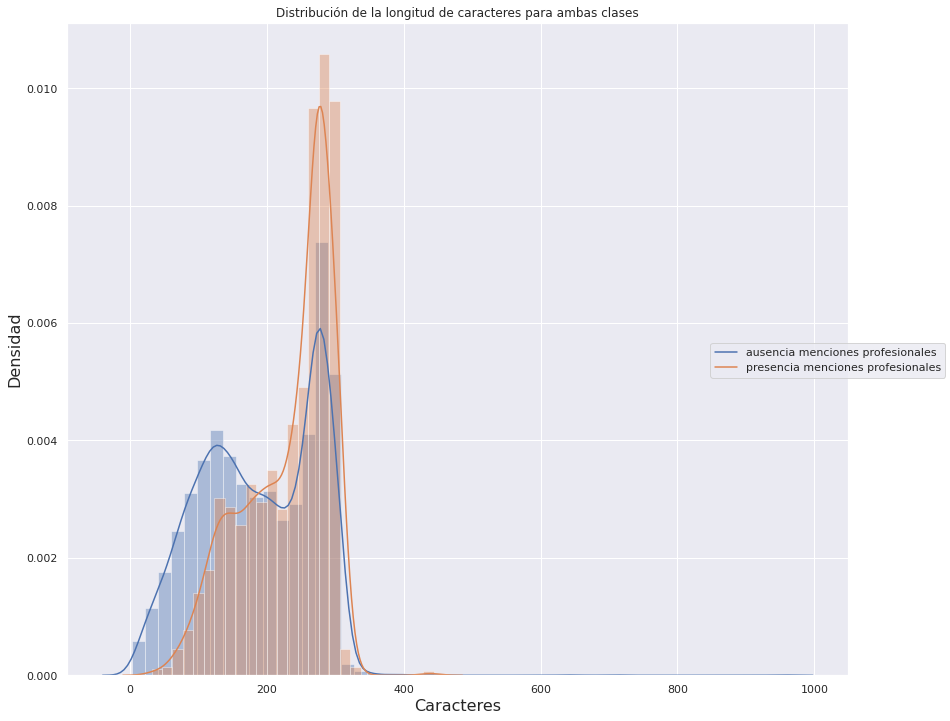

In [22]:
fig = plt.figure(figsize=(14,12))

plt1 = sns.distplot(dataset[dataset.label==0].char_len, hist=True, label="ausencia menciones profesionales")
plt2 = sns.distplot(dataset[dataset.label==1].char_len, hist=True, label="presencia menciones profesionales")
fig.legend(labels=['ausencia menciones profesionales','presencia menciones profesionales'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title("Distribución de la longitud de caracteres para ambas clases")

# Finalmente mostramos el gráfico:
plt.show()

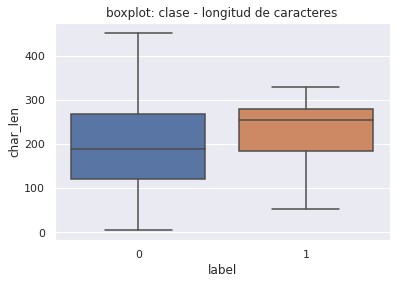

In [23]:
ax = sns.boxplot(x="label", y="char_len", data=dataset, showfliers = False)
ax.set_title("boxplot: clase - longitud de caracteres")
plt.show()

Como vemos, no apreciamos una diferencia en la distribución de las clases frente a esta variable que sea muy acentuada. Aún así se distingue como la clase 1 está inclinada ligeramente hacia tweets más largos. Encontrar este tipo de desequilibrios son muy importantes a la hora de entrenar a nuestor modelo, pues serán características en las que se podrá basar cuantitativamente para clasificar nuevas isntancias.

A continuación pasamos a estudiar los outliers. Lo hacemos primero con todos los datos y después con las dos clases por separado.

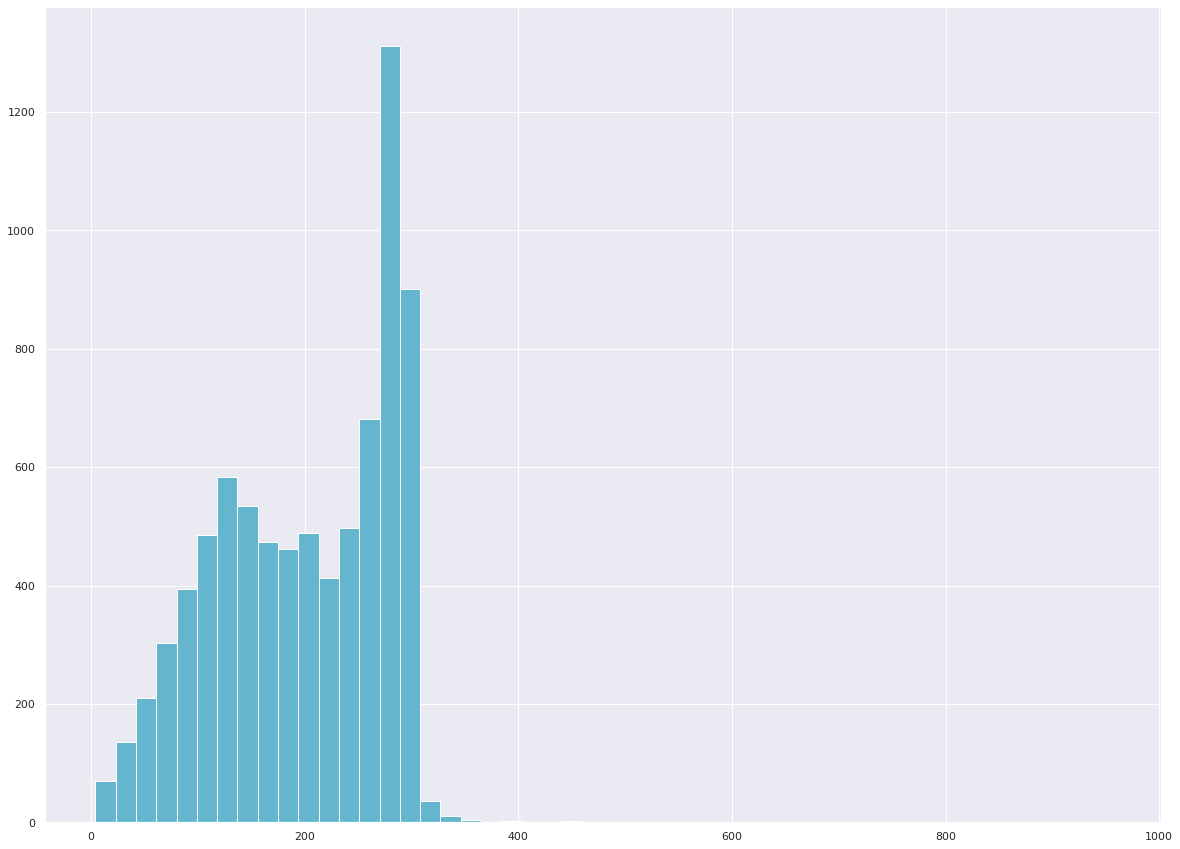

In [61]:
dataset["char_len"].hist(bins=50, figsize=(20,15), color="c")   
plt.show()

Número de tweets con label=0 de una extensión superior a 700 caracteres:  2


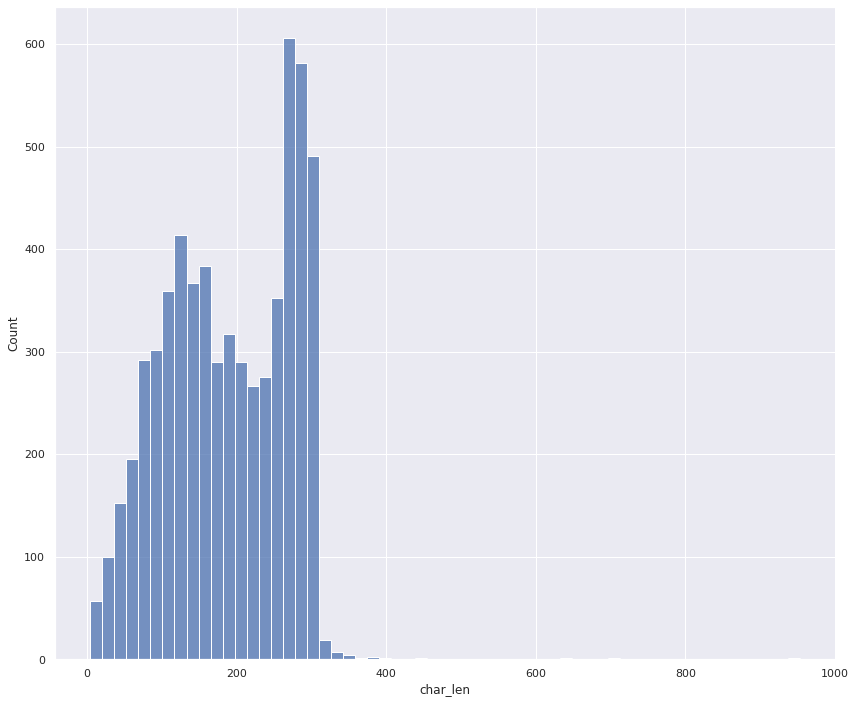

In [25]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(14,12))
sns.histplot(data=dataset[dataset.label==0], x="char_len")

count = (dataset[dataset.label==0]["char_len"] > 700).sum()
print('Número de tweets con label=0 de una extensión superior a 700 caracteres: ', count)

Número de tweets con label=0 de una extensión superior a 500 caracteres:  0


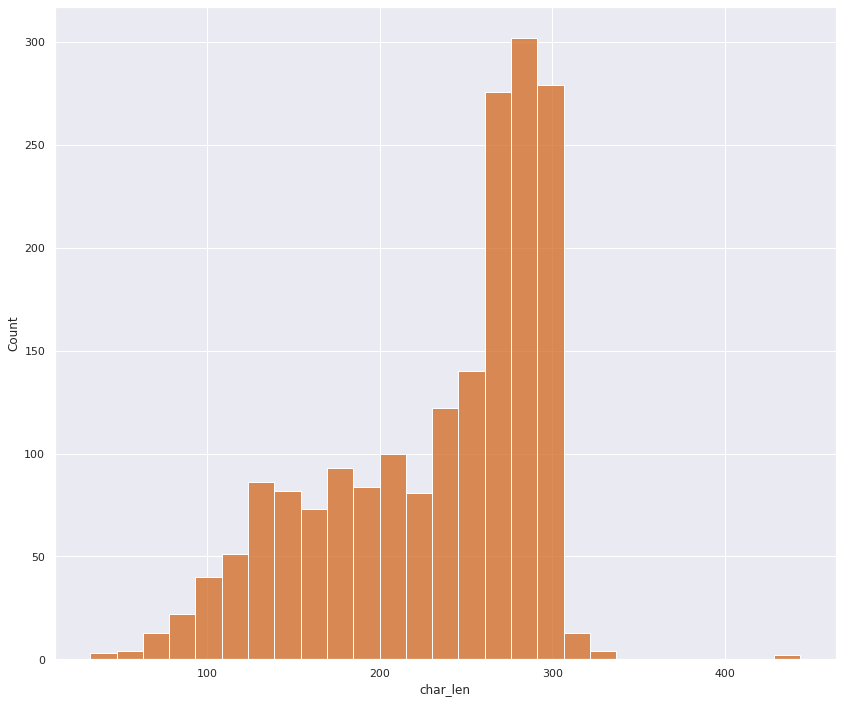

In [26]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(14,12))
sns.histplot(data=dataset[dataset.label==1], x="char_len", color="chocolate")

count = (dataset[dataset.label==1]["char_len"] > 500).sum()
print('Número de tweets con label=0 de una extensión superior a 500 caracteres: ', count)

In [27]:
pd.options.display.max_colwidth = 1000
dataset[dataset["char_len"]>700]["tweet_text"]

2949    @JuanParejoFdez @FdezParejo @A3Noticias @GFVara @Juanhann64 @VGdelMoral @PPopularCC @fjmanzanop @consuelorpiriz @Cienfuegos90 @LAHCarron @ppextremadura @marroyo65 @EPExtremadura @hoyextremadura @OCR_Extremadura @CopeExtremadura @EfeExtremadura @EP_Extremadura @EXNdigital @SERextremadura @Region_Digital @Extremadura7D @cextremadura @abc_es @larazon_es @HerreraenCOPE @elmundoes @elespanolcom @okdiario @elperiodico @OndaCero_es @informativost5 @Junta_Ex @la_informacion @susannagriso @AngelesBlancoTV @VicenteVallesTV @esRadio @desdelamoncloa @fernangonzalez @asambleaex @NNGGExtremadura @NNGG_Es @Gema_Cortes @PP_Badajoz @eduardoinda @pacomarhuenda @pedroj_ramirez @davidvigario A la atención de la Comisión de Peticiones de la Asamblea de Extremadura  Petición sobre el por qué en la Residencia Asistida de Mayores 'El Cuartillo' de Cáceres se han producido tantos muertos y contagiados por coronavirus  https://t.co/8uxRIL43qs https://t.co/zTCMoIeUB6
4707                                 

A pesar de que el número de caracteres máximos de un tweet son 280, nos encontramos con muchas instancias que sobrepasan este valor, incluso llegando a doblarlo en algunos casos. Sin embargo, no vamos a considerar a ninguno de estos datos como "outliers" al no ser excesivamente atípicos. Además, hemos comprobado que aparecen muchas menciones en este tipo de tweets, lo que puede ser el motivo del exceso de caracteres.

Vamos ahora a definir una función con la que contaremos el número de mayúsculas que hay en cada tweet, almacenando este valor en una nueva columna. Poateriormente realizaremos el mismo análisis que el que hemos visto anteriormente con la variable "char_len"

In [62]:
def count_upper_case_letters(str_obj):
    count = 0
    for elem in str_obj:
        if elem.isupper():
            count += 1
    return count

In [63]:
dataset["prop_uppercase"] = dataset["tweet_text"].apply(lambda x: count_upper_case_letters(x)/len(x))


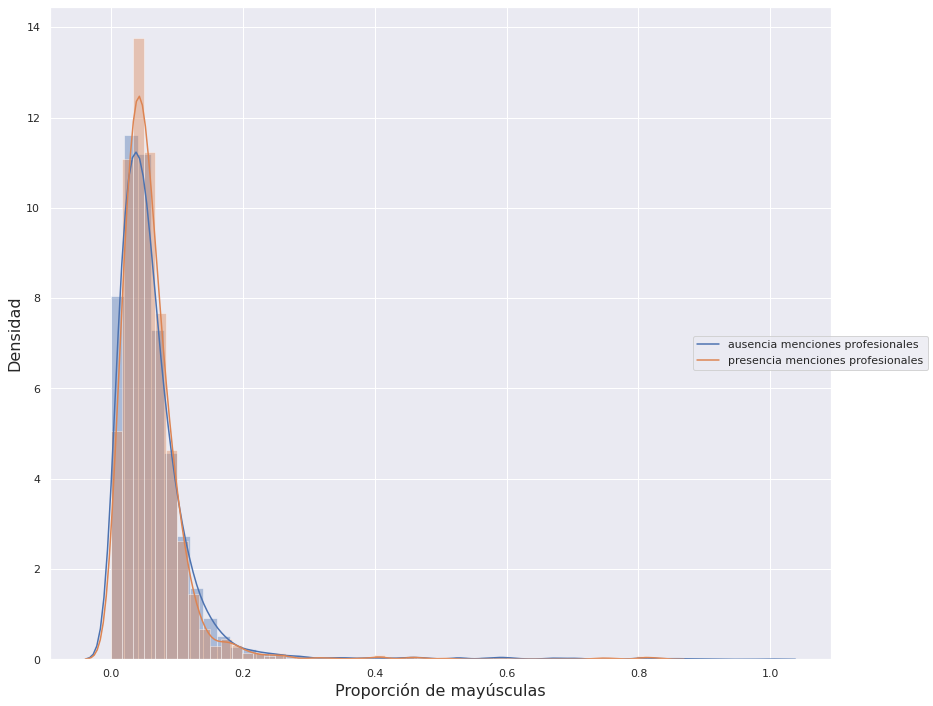

In [30]:
fig = plt.figure(figsize=(14,12))

plt1 = sns.distplot(dataset[dataset.label==0].prop_uppercase, hist=True, label="ausencia menciones profesionales")
plt2 = sns.distplot(dataset[dataset.label==1].prop_uppercase, hist=True, label="presencia menciones profesionales")
fig.legend(labels=['ausencia menciones profesionales','presencia menciones profesionales'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Proporción de mayúsculas', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Finalmente definimos una función que cuente cuántas palabras de un string son superiores a un determinado valor, variable que puede resultar interesante a la hora de mejorar las predicciones:

In [64]:
def string_k(k, str):
     
    string = []
    text = str.split(" ")
    
    for x in text:
         x = ''.join([i for i in x if not i.isdigit()])
         x = re.sub(r'[^\w]', ' ', x)
         if len(x) > k:

             string.append(x)
             
    return len(set(string))/len(text)

In [65]:
dataset["prop_long"] = dataset["tweet_text"].apply(lambda x: string_k(7, x))

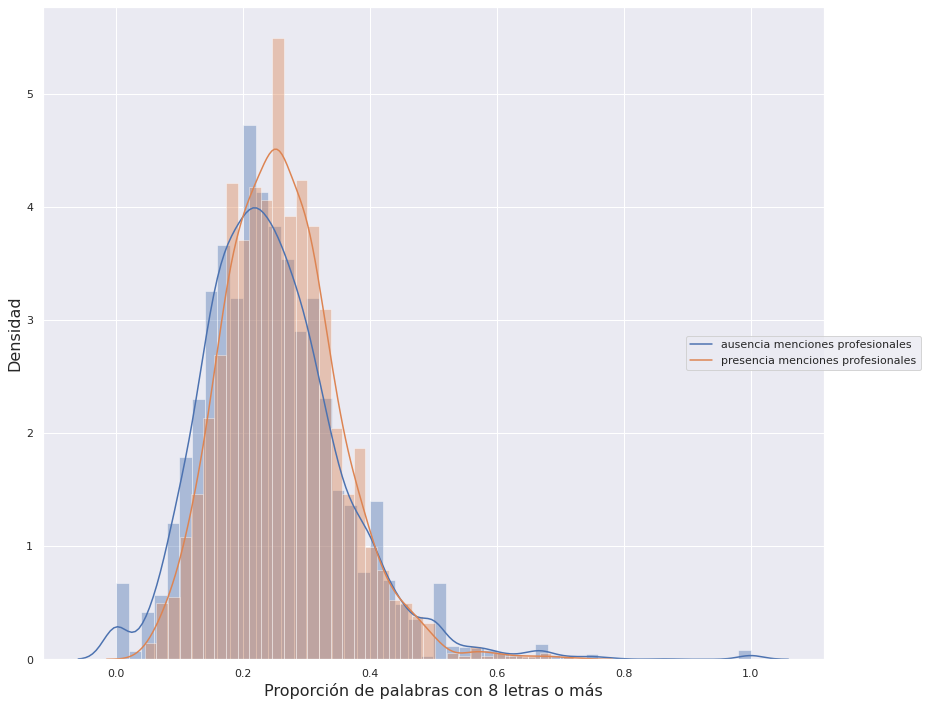

In [33]:
fig = plt.figure(figsize=(14,12))

plt1 = sns.distplot(dataset[dataset.label==0].prop_long, hist=True, label="ausencia menciones profesionales")
plt2 = sns.distplot(dataset[dataset.label==1].prop_long, hist=True, label="presencia menciones profesionales")
fig.legend(labels=['ausencia menciones profesionales','presencia menciones profesionales'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Proporción de palabras con 8 letras o más', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Vemos como escogiendo un k=7 encontramos un cierto desbalanceo de las clases, mostrando label=1 una tendencia a tener más palabras grandes que label=0. De todas formas tampoco va a ser una variable que nos ayude enormemente.

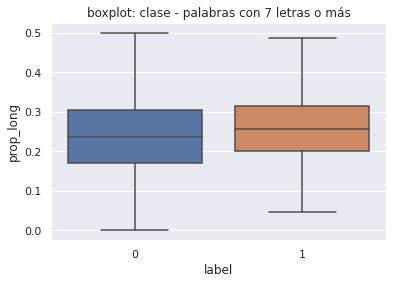

In [34]:
ax = sns.boxplot(x="label", y="prop_long", data=dataset, showfliers = False)
ax.set_title("boxplot: clase - palabras con 7 letras o más")
plt.show()

Podríamos continuar buscando variables y relaciones, o modificando los datos (por ejemplo eliminando las menciones o los enlaces) para tratar de mejorar estas distribuciones o boxplots de las variables con la clase a predecir. Sin embargo, teniendo en cuenta el enfoque didáctico de este informe, consideramos que estamos listos para pasar al siguiente bloque:

## 3. Preprocesado y Normalización

A contiuación definimos algunas funciones que ya hemos empleado durante el curso para tokenizar. Cabe destacar que importamos la función SnowballStemmer de la librería NTK y que la cargamos con el input "spanish" para hacer el stemming en español, el idioma en el que están escritos nuestros tweets.


In [35]:
# Eliminar espacios
def eliminar_espacios(text): 
    return  " ".join(text.split())   #"".join(input) devuelve el input como un string. Por ejemplo una lista la pasa a string.

# To lower
def texto_to_lower(text):
  return text.lower()

# Tokenizador
from nltk import word_tokenize
def tokenization(text):
  tokens = word_tokenize(text)
  return tokens

def replace_contraction(text):
    expanded_words = []
    for t in text.split():
        expanded_words.append(contractions.fix(t))
    expanded_text = ' '.join(expanded_words) 
    return expanded_text

# Quitar stop words
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuación (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words

# Lemmatization

import string 
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')   
def stem(tokens): 
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens

Empleamos ahora la función sentiment de la librería sentiment-spanishy que utiliza un modelo de redes neuronales para predecir el sentimiento de frases en español. Dejamos la información sobre cómo se ha creado la librería en el enlace inferior:

https://pypi.org/project/sentiment-analysis-spanish/

La función devuelve un valor entre 0 y 1 dependiendo del grado de positividad de la frase:

In [106]:
frase = dataset["tweet_text"][5]
print(frase)
print(sentiment.sentiment(frase))

Lo nunca visto, aqui en España, por lo q se ve nos resucitan los muertos.Cada vez veo menos. No lo digo con ironía, lo digo con muchisima indignación, lo matizo/ 27.125 fallecidos en España: el coronavirus, comunidad por comunidad  https://t.co/PBD6ktbWNv  Enviado desde @updayESP
2.2115023795310016e-08


De este modo, creamos nuestra nueva variable con apply:

In [ ]:
dataset["sentimiento"] = dataset["tweet_text"].apply(lambda x: sentiment.sentiment(x))

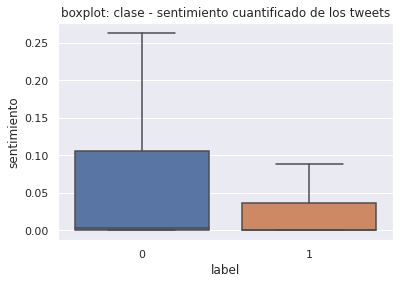

In [110]:
ax = sns.boxplot(x="label", y="sentimiento", data=dataset, showfliers = False)
ax.set_title("boxplot: clase - sentimiento cuantificado de los tweets")
plt.show()

Observamos como prácticamente los tweets pertenecientes a ambas clases no muestran un sentimiento muy alejado a 0 (mediana y primer cuartil coinciden en el origen). Sin embargo sí que parece que hay una pequeña tendencia a mostrar un sentimiento positivo para la clase de tweets que no menciona puestos profesionales. Esto tiene sentido, pues podemos intuír que los tweets que sí lo hagan se mantendrán en un tono más neutral o serio. No parece que vaya a ayudar mucho, pero mantenemos nuestra variable para el análisis.

Pasamos a continuación a preprocesar, tokenizar y lematizar nuestros datos con las funciones previamente definidas:

In [111]:
# Quitar Espacios
dataset["norm"] = dataset["tweet_text"].apply(lambda x: eliminar_espacios(x))
# To Lower
dataset["norm"] = dataset["norm"].apply(lambda x: texto_to_lower(x))
# Contraciones
dataset["norm"] = dataset["norm"].apply(lambda x: replace_contraction(x))
# Tokenizar
dataset["norm"] = dataset["norm"].apply(lambda x: tokenization(x))
# Quitar Stopwords
dataset["norm"] = dataset["norm"].apply(lambda x: quitar_stopwords(x))
# Quitar puntuación
dataset["norm"] = dataset["norm"].apply(lambda x: quitar_puntuacion(x))
# Stemming
dataset["norm"] = dataset["norm"].apply(lambda x: stem(x))

In [112]:
dataset["norm"][4]

['si',
 'confin',
 'dej',
 'toc',
 'estabil',
 'mental',
 'siempr',
 'pued',
 'consolart',
 'pens',
 'miguel',
 'bos',
 'qued',
 'peor']

In [113]:
dataset["clean_text"] = dataset["norm"].apply(lambda x: " ".join(x))

In [114]:
dataset["clean_text"][4]


'si confin dej toc estabil mental siempr pued consolart pens miguel bos qued peor'

Podemos crear otro par de variables como las que habíamos creado anteriormente, pero ahora después de haber procesado y tokenizado el texto.

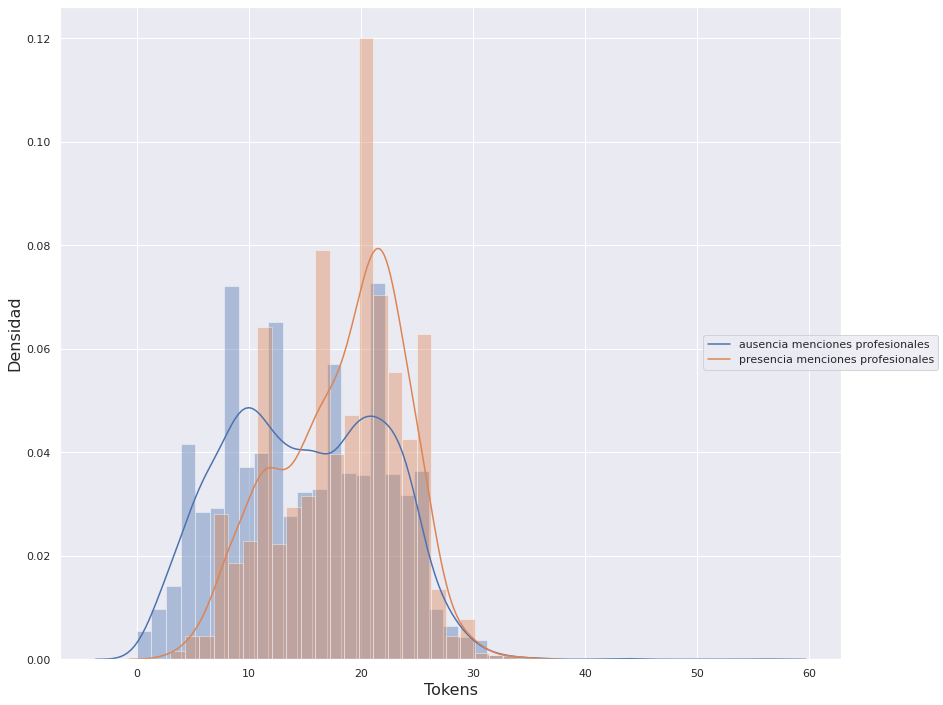

In [115]:
dataset["token_len"] = dataset["norm"].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,12))

plt1 = sns.distplot(dataset[dataset.label==0].token_len, hist=True, label="ausencia menciones profesionales")
plt2 = sns.distplot(dataset[dataset.label==1].token_len, hist=True, label="presencia menciones profesionales")
fig.legend(labels=['ausencia menciones profesionales','presencia menciones profesionales'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Tokens', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

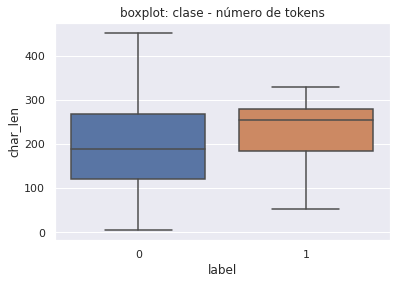

In [116]:
ax = sns.boxplot(x="label", y="char_len", data=dataset, showfliers = False)
ax.set_title("boxplot: clase - número de tokens")
plt.show()

In [117]:
dataset["prop_token_long"] = dataset["clean_text"].apply(lambda x: string_k(6, x))

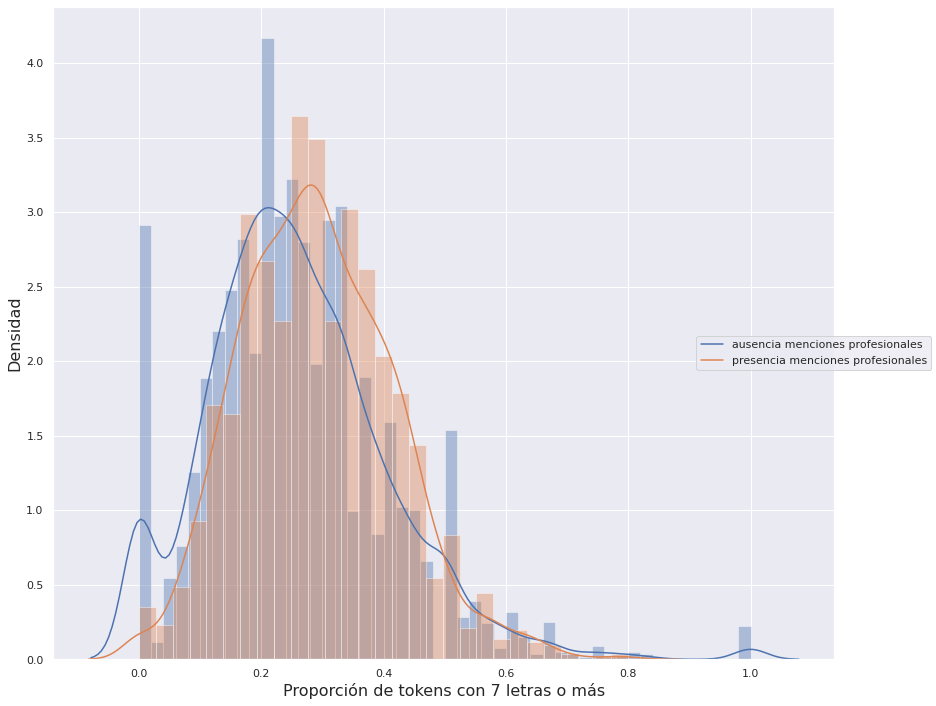

In [118]:
fig = plt.figure(figsize=(14,12))

plt1 = sns.distplot(dataset[dataset.label==0].prop_token_long, hist=True, label="ausencia menciones profesionales")
plt2 = sns.distplot(dataset[dataset.label==1].prop_token_long, hist=True, label="presencia menciones profesionales")
fig.legend(labels=['ausencia menciones profesionales','presencia menciones profesionales'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Proporción de tokens con 7 letras o más', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Finalmente generamos un wordcloud con las palabras que más se repiten en nuestro dataset.

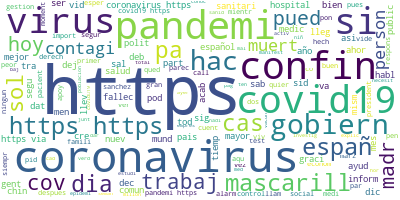

In [119]:
datawords = list()

for i in dataset["norm"]: # iteramos sobre la lista de "text_procesed" del dataset2 
  datawords.append(i)

import itertools
datawords= list(itertools.chain.from_iterable(datawords))

from wordcloud import WordCloud
long_string = ','.join([str(item) for item in datawords])
wordcloud_new = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
wordcloud_new.generate(long_string)
wordcloud_new.to_image()


Volvemos a repetir que podríamos intentar mejorar nuestros datos eliminando los enlaces a sitios web o las menciones, pero como esto podría darnos algún tipo de información decidimos dejarlo así. Lo que sí podemos hacer es crear variables nuevas que nos indiquen si en el mensaje existen este tipo de elementos o no (True/False).

In [128]:
def isword(word, string):
  if word in string:
    return 1
  else:
    return 0

dataset["site"] = dataset["clean_text"].apply(lambda x: isword("https", x))

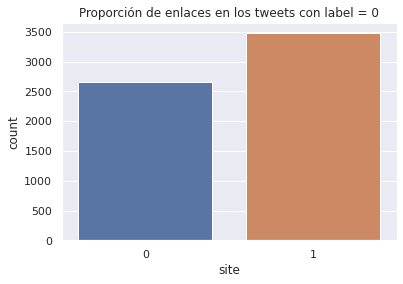

In [129]:
ax = sns.countplot(x="site", data = dataset[dataset.label == 0]).set(title='Proporción de enlaces en los tweets con label = 0')

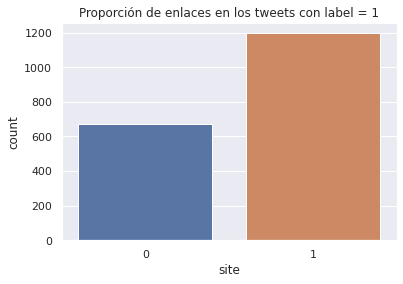

In [130]:
ax = sns.countplot(x="site", data = dataset[dataset.label == 1]).set(title='Proporción de enlaces en los tweets con label = 1')

Como vemos, hemos encontrado otro pequeño desbalance, ya que parece que en los tweets en los que se menciona una profesión el porcentaje de la presencia de enlaces aumenta.

## 4. Vectorización

Empezamos solucionando el problema que teníamos con el desequilibrio de la clase a predecir. En este caso hacemos un Random-Under-Sampling manualmente, que consiste en quedarnos con un set de train balanceado, eliminando aleatoriamente instancias pertenecientes a la clase mayoritaria. Existen otras formas de afrontar este problema, pero es importante aplicar algún método. En el caso de no hacerlo nuestro modelo caería en la trampa métrica, que consiste en predecir todas las instancias como pertenecientes a la clase mayoritaria para así aumentar el accuracy lo máximo posible. Esto nos impediría detectar elementos pertenecientes a la clase minoritaria, que con mucha frecuencia es el objeto de estudio y cuya identificación es la que motiva realmente la fabricación del modelo.

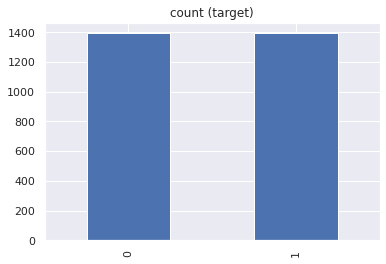

In [131]:
train = dataset[dataset.set=="train"]
test = dataset[dataset.set=="valid"]

count_0, count_1 = train["label"].value_counts()

class_0 = train[train.label==0]
class_1 = train[train.label==1]
class_0_under = class_0.sample(count_1)
train_under = pd.concat([class_0_under, class_1], axis=0)

train_under['label'].value_counts().plot(kind='bar', title='count (target)')

Vectorizamos ahora los textos con TF-IDF

In [132]:
vectorizador = TfidfVectorizer(max_features=50,                  
                               ngram_range=(1,3),
                               min_df=0.01,
                               lowercase=False)

vector_data_train = vectorizador.fit_transform(train_under["clean_text"])
vector_data_test = vectorizador.fit_transform(test["clean_text"])

## 5. Entrenamiento y evaluación de modelos


Pasamos finalmente a la generación de nuestro modelo:

In [133]:
print(dataset.columns)

Index(['tweet_id', 'tweet_text', 'label', 'set', 'char_len', 'prop_uppercase',
       'prop_long', 'norm', 'clean_text', 'token_len', 'prop_token_long',
       'site', 'ismention', 'sentimiento'],
      dtype='object')


Con scipy.sparse.hstack unimos nuestras nuevas variables con los vectores del TF-IDF tanto en el set de train como en el de test:

In [135]:
import scipy as sp

extra_features_train = train_under[["char_len", "prop_uppercase", "prop_long", "token_len", "prop_token_long", "site", "sentimiento"]]
extra_features_test = test[["char_len", "prop_uppercase", "prop_long", "token_len", "prop_token_long", "site", "sentimiento"]]

y_train = train_under["label"].values.astype(np.float32)
X_train = sp.sparse.hstack((vector_data_train, extra_features_train.values),format='csr')

y_test = test["label"].values.astype(np.float32)
X_test = sp.sparse.hstack((vector_data_test, extra_features_test.values),format='csr')


In [136]:
X_columns=vectorizador.get_feature_names()+extra_features_train.columns.tolist()
X_columns

['ahor',
 'asi',
 'cas',
 'comun',
 'confin',
 'contagi',
 'coronavirus',
 'coronavirus https',
 'cov',
 'covid19',
 'cre',
 'crisis',
 'dej',
 'dia',
 'dias',
 'dic',
 'españ',
 'fallec',
 'gent',
 'gestion',
 'gobiern',
 'hac',
 'hoy',
 'https',
 'https https',
 'llev',
 'madr',
 'mascarill',
 'med',
 'medi',
 'mes',
 'muert',
 'nuev',
 'pais',
 'pandemi',
 'pas',
 'person',
 'pod',
 'public',
 'pued',
 'sab',
 'salud',
 'sanchez',
 'sanitari',
 'ser',
 'si',
 'sol',
 'trabaj',
 'vid',
 'virus',
 'char_len',
 'prop_uppercase',
 'prop_long',
 'token_len',
 'prop_token_long',
 'site',
 'sentimiento']

Utilizamos otra función ya conocida del curso para evluar los diferentes modelos:

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings 
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #Para cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore') 
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98) #Provides train/test indices to split data in train/test sets

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)
          
          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)
          
          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Evaluamos tres, entre los que el LogisticRegression es el que tiene un mejor funcionamiento:

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
          ("Logistic",LogisticRegression(random_state=30)),
          ("DecisionTree", DecisionTreeClassifier()),
          ("GaussianNB",GaussianNB())
]

evaluation_score = "accuracy"
model_evaluation(models,  evaluation_score, X_train.toarray(), y_train)   

Metric: accuracy , KFold 
Logistic: 0.691681 (0.017154) 
Metric: accuracy , KFold 
DecisionTree: 0.620243 (0.021896) 
Metric: accuracy , KFold 
GaussianNB: 0.652555 (0.027053) 


([array([0.68458781, 0.71684588, 0.67741935, 0.66666667, 0.67741935,
         0.70250896, 0.67625899, 0.70143885, 0.6942446 , 0.71942446]),
  array([0.61648746, 0.63082437, 0.65232975, 0.60573477, 0.59139785,
         0.62724014, 0.64748201, 0.64028777, 0.58633094, 0.60431655]),
  array([0.65232975, 0.63082437, 0.61290323, 0.64516129, 0.68817204,
         0.66666667, 0.61510791, 0.66906475, 0.64748201, 0.69784173])],
 ['Logistic', 'DecisionTree', 'GaussianNB'])

A continuación empleamos GridSearhCV para establecer los mejores parámetros:

In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.05]

In [140]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [141]:
grid_result = grid_search.fit(X_train, y_train)
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.592530 usando los parámetros {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


Finalmente entrenamos nuestro modelo y hacemos predicciones:

In [142]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C=100, penalty="l2", solver = "newton-cg")
model.fit(X_train,y_train)

LogisticRegression(C=100, solver='newton-cg')

In [143]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[938 585]
 [229 248]]
              precision    recall  f1-score   support

         0.0       0.80      0.62      0.70      1523
         1.0       0.30      0.52      0.38       477

    accuracy                           0.59      2000
   macro avg       0.55      0.57      0.54      2000
weighted avg       0.68      0.59      0.62      2000



Como se puede observar en la matriz de confusión, el modelo funciona mejor a la hora de reconocer la clase 0 que la clase 1. Esto tiene sentido, puesto que en los datos del training ambas clases se encuentran balanceadas, mientras que en los datos del test no es así, habiendo muchas más instancias de clase 0 que de clase 1. Es por esto por lo que las predicciones tienden a mantenerse dentro del 50%. 

Podríamos haber decidido balancear el set de test también, pero se suele considerar como máxima nunca tocas este set, puesto que estarías falseando lo que más adelante será un problema real.

Aún así las predicciones son aceptablemente buenas, consiguiéndose un f1-score cercano a 0.40 para la clase minoritaria, lo que nos indica que nuestro modelo sí es capaz de reconocer mensajes en los que hay menciones profesionales.

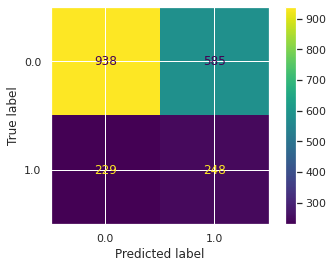

In [144]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, normalize = None)

Para terminar podemos mostrar la relevancia de algunas variables. A partir de esta información podríamos decidir descartar algunas e incluír otras para mejorar un poco el rendimiento.

In [145]:
importance = model.coef_[0]

Feature: 0, Name: ahor , Score: -0.82500
Feature: 1, Name: asi , Score: -0.50485
Feature: 2, Name: cas , Score: 0.14797
Feature: 3, Name: comun , Score: 0.31825
Feature: 4, Name: confin , Score: 0.09667
Feature: 5, Name: contagi , Score: 0.78241
Feature: 6, Name: coronavirus , Score: -0.31062
Feature: 7, Name: coronavirus https , Score: -0.47360
Feature: 8, Name: cov , Score: -0.03814
Feature: 9, Name: covid19 , Score: 0.39565
Feature: 10, Name: cre , Score: -0.62201
Feature: 11, Name: crisis , Score: -0.90342
Feature: 12, Name: dej , Score: -0.48703
Feature: 13, Name: dia , Score: 0.19261
Feature: 14, Name: dias , Score: -0.15945
Feature: 15, Name: dic , Score: 0.32307
Feature: 16, Name: españ , Score: -0.09870
Feature: 17, Name: fallec , Score: 0.22890
Feature: 18, Name: gent , Score: -0.28310
Feature: 19, Name: gestion , Score: 0.31884
Feature: 20, Name: gobiern , Score: 0.22117
Feature: 21, Name: hac , Score: 0.45643
Feature: 22, Name: hoy , Score: -0.02067
Feature: 23, Name: https

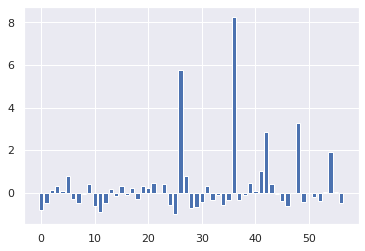

In [146]:
for i,v in enumerate(importance):
 print('Feature: %0d, Name: %s , Score: %.5f' % (i,X_columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()